In [1]:
# Importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# get the data
raw_data = pd.read_csv('Walmart_Store_sales.csv')

In [3]:
#checking the raw data
raw_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
# Make the copy of raw Data and use it for further study
df = raw_data.copy()

In [7]:
# Checking the shape of data
df.shape

(6435, 8)

In [6]:
# getting the total information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


## Which store has maximum sales

In [65]:
df[df['Weekly_Sales'] == max(df['Weekly_Sales'])]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.54459,8.724


In [69]:
# the above data can also be fteched by following
df.nlargest(3,'Weekly_Sales')[['Store','Weekly_Sales']]

,Store,Weekly_Sales
1905,14,3818686.45
2763,20,3766687.43
1333,10,3749057.69


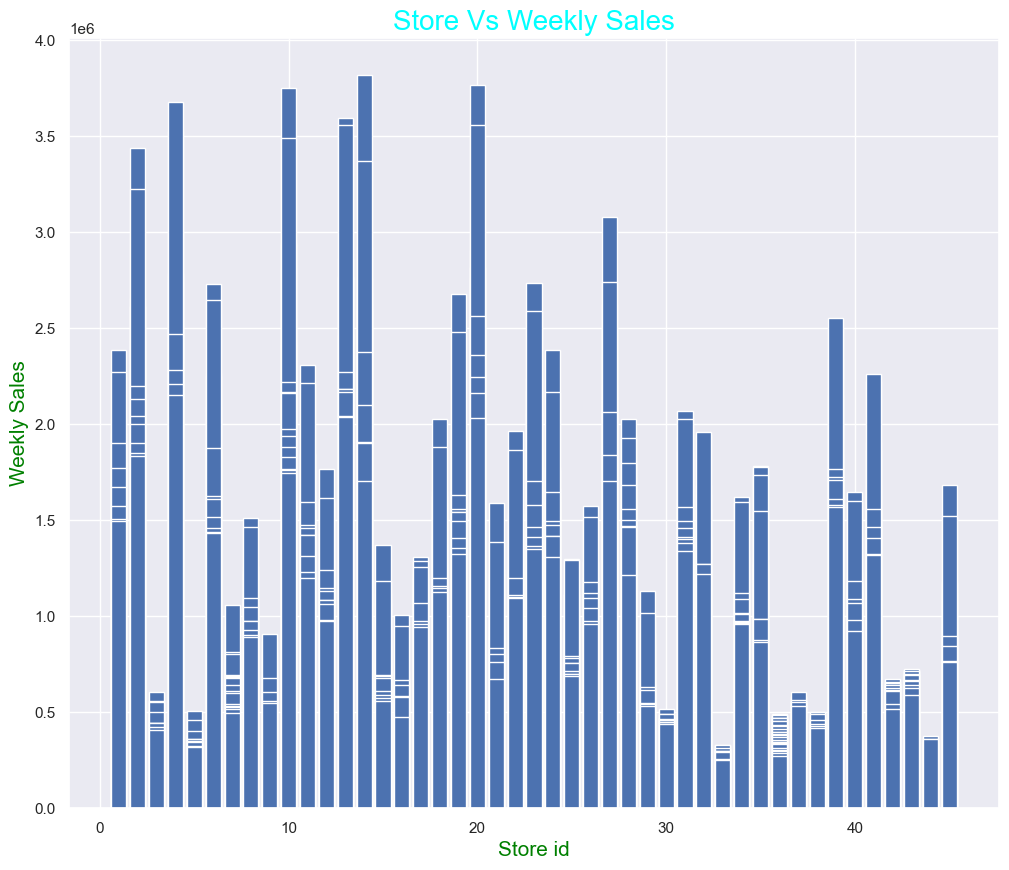

In [70]:
plt.figure(figsize = (12,10))
plt.bar(x = df['Store'],height = df['Weekly_Sales'])
plt.xlabel('Store id',fontdict={'font':'arial','size':15,'color':'green'})
plt.ylabel('Weekly Sales',fontdict={'font':'arial','size':15,'color':'green'})
plt.title('Store Vs Weekly Sales',fontdict={'font':'arial','size':20,'color':'Cyan'})
plt.show()

From above we can conclude that Shop 14 have the maximum sales then follwed by 20 and 10.

### 2.Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [79]:
df.groupby('Store')['Weekly_Sales'].std().nlargest()

Store
14    317569.949476
10    302262.062504
20    275900.562742
4     266201.442297
13    265506.995776
Name: Weekly_Sales, dtype: float64

<AxesSubplot:title={'center':'Store wise Standard Deviation of sales'}, xlabel='Store', ylabel='Standard Deviation of sales'>

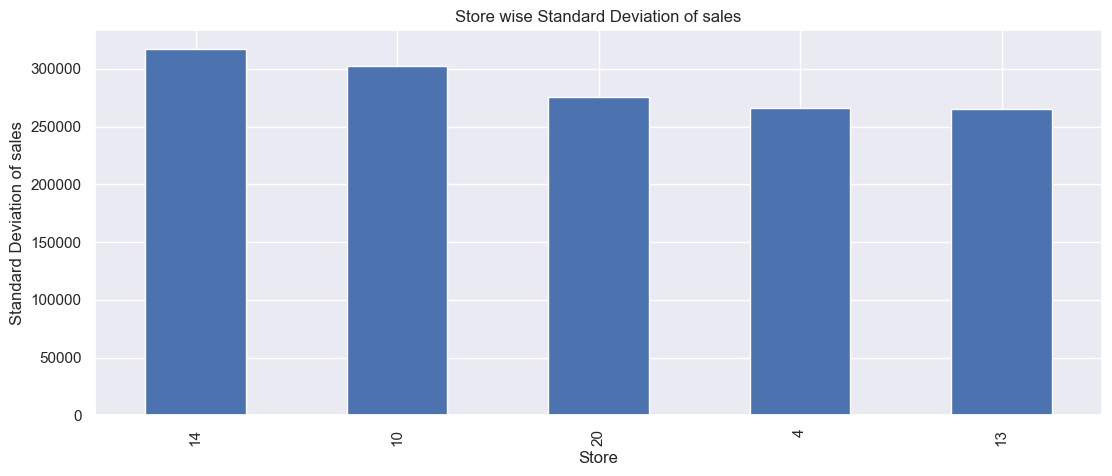

In [87]:
df.groupby('Store')['Weekly_Sales'].std().nlargest().plot(kind = 'bar',xlabel = 'Store',ylabel = 'Standard Deviation of sales',title = 'Store wise Standard Deviation of sales')

From above we can conclude that sales of shop 14 vary alot that is its standard deviation vary alot.

In [181]:
# Coefficient of mean to standard deviation
df.groupby('Store')['Weekly_Sales'].std()/df.groupby('Store')['Weekly_Sales'].mean()

Store
1     0.100292
2     0.123424
3     0.115021
4     0.127083
5     0.118668
6     0.135823
7     0.197305
8     0.116953
9     0.126895
10    0.159133
11    0.122262
12    0.137925
13    0.132514
14    0.157137
15    0.193384
16    0.165181
17    0.125521
18    0.162845
19    0.132680
20    0.130903
21    0.170292
22    0.156783
23    0.179721
24    0.123637
25    0.159860
26    0.110111
27    0.135155
28    0.137330
29    0.183742
30    0.052008
31    0.090161
32    0.118310
33    0.092868
34    0.108225
35    0.229681
36    0.162579
37    0.042084
38    0.110875
39    0.149908
40    0.123430
41    0.148177
42    0.090335
43    0.064104
44    0.081793
45    0.165613
Name: Weekly_Sales, dtype: float64

In [88]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## 3.Which store/s has good quarterly growth rate in Q3’2012

In [97]:
# Converting Date Column to datetime 
df['Date'] = pd.to_datetime(df['Date'],format= "%d-%m-%Y")

In [134]:
# get the Quarter and Year from Date column and storing it in a new columns 
df["Quarter"] = df["Date"].dt.quarter
df['Year'] = df['Date'].dt.year

In [155]:
# Get storewise sum of Sales in Q3 of 2012
df_2012_Q3 = df.groupby(['Year','Quarter']).get_group((2012,3))
df_2012_Q3 = df_2012_Q3.groupby('Store').sum()
df_2012_Q3

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Year
Store,,,,,,,,
1,20253947.78,1,1040.81,45.775,2888.890624,89.804,39,26156
2,24303354.86,1,1071.15,45.775,2884.164864,85.345,39,26156
3,5298005.47,1,1073.28,45.775,2934.649649,82.342,39,26156
4,27796792.46,1,1009.14,45.490,1700.795569,53.001,39,26156
5,4163790.99,1,1066.70,45.775,2896.556440,72.839,39,26156
6,20167312.24,1,1066.67,45.775,2909.869292,73.684,39,26156
7,8262787.39,1,774.89,46.919,2575.194165,102.336,39,26156
8,11748952.70,1,1006.60,45.775,2935.289872,70.213,39,26156
9,7022149.56,1,1068.41,45.775,2937.819529,68.601,39,26156


In [154]:
#  Get storewise sum of Sales in Q2 of 2012
df_2012_Q2 = df.groupby(['Year','Quarter']).get_group((2012,2))
df_2012_Q2 = df_2012_Q2.groupby('Store').sum()
df_2012_Q2

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Year
Store,,,,,,,,
1,20978760.12,0,969.23,47.079,2881.918674,92.859,26,26156
2,25083604.88,0,974.45,47.079,2877.212466,89.583,26,26156
3,5620316.49,0,1013.92,47.079,2927.488384,86.632,26,26156
4,28454363.67,0,977.45,46.896,1703.025582,56.004,26,26156
5,4466363.69,0,986.51,47.079,2889.552775,75.413,26,26156
6,20833909.92,0,993.86,47.079,2902.810549,77.532,26,26156
7,7290859.27,0,680.43,49.688,2569.557662,105.170,26,26156
8,11919630.95,0,933.54,47.079,2928.125957,73.827,26,26156
9,7484935.11,0,987.87,47.079,2930.645149,72.007,26,26156


In [171]:
# Finding out store/s has good quarterly growth rate in Q3’2012
growth_rate = ((df_2012_Q3['Weekly_Sales']-df_2012_Q2['Weekly_Sales'])/df_2012_Q2['Weekly_Sales'])*100
growth_rate.sort_values(ascending= False).head(5)

Store
7     13.330776
16     8.488378
35     4.466637
26     3.955478
39     2.478404
Name: Weekly_Sales, dtype: float64

In [172]:
# The above solution can also be acheived by

# Filter for Q2 and Q3 of 2012
df_Q2 = df[(df["Year"] == 2012) & (df["Quarter"] == 2)]
df_Q3 = df[(df["Year"] == 2012) & (df["Quarter"] == 3)]

# Group by store
df_Q2 = df_Q2.groupby("Store").sum()
df_Q3 = df_Q3.groupby("Store").sum()

# Calculate growth rate
df_Q3["Growth Rate"] = (df_Q3["Weekly_Sales"] - df_Q2["Weekly_Sales"]) / df_Q2["Weekly_Sales"]

# Sort by growth rate
df_Q3 = df_Q3.sort_values("Growth Rate", ascending=False)

# Print store with highest growth rate
df_Q3.head(5)
#This will give you the store with the good growth rates in Q3 2012.

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Year,Growth Rate
Store,,,,,,,,,
7,8262787.39,1,774.89,46.919,2575.194165,102.336,39,26156,0.133308
16,7121541.64,1,829.40,46.919,2575.194165,78.793,39,26156,0.084884
35,11322421.12,1,969.52,48.990,1850.758425,114.907,39,26156,0.044666
26,13675691.91,1,806.81,49.461,1798.524059,96.265,39,26156,0.039555
39,20715116.23,1,1050.91,45.775,2871.733870,86.099,39,26156,0.024784
